In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs

In [18]:
X, Y = make_blobs(n_samples=100, n_features=2, centers=[[-3,4],[2,5],[3.5,2]], cluster_std=1, random_state=0)

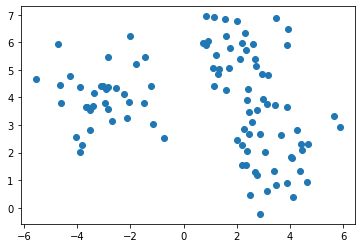

In [19]:
plt.scatter(X[:,0], X[:,1])

In [20]:
def fit(X, k):
    centroids = X[np.random.randint(0,X.shape[0], size=k)] #choose k centroids
    labels = np.argmin(cdist(X, centroids,'euclidean'), axis=1)
    for _iteration in range(10):
        previous_labels = labels.copy()
        centroids = np.array([np.mean(X[labels==r], axis=0) for r in range(k)])
        labels = np.argmin(cdist(X, centroids,'euclidean'), axis=1)
        if all(labels == previous_labels):
            break
    return centroids, labels

In [21]:
centroids, labels = fit(X, 3)

In [22]:
print(centroids)
print(labels)

[[-3.01578073  4.0050991 ]
 [ 1.99700514  5.62250633]
 [ 3.38973952  2.12303632]]
[0 2 0 2 2 0 0 2 1 0 2 1 1 2 2 0 2 1 2 1 1 0 1 1 1 0 1 0 1 2 0 0 1 2 2 2 2
 0 2 2 0 2 2 2 1 0 1 0 1 2 0 2 0 0 0 2 2 2 2 2 1 1 1 1 0 0 0 2 1 0 0 1 0 2
 0 0 0 1 0 1 1 2 2 0 2 2 0 2 0 2 0 1 1 2 0 1 2 1 1 1]


In [23]:
def plot_kmeans(X,centroids, labels, rseed=0, ax=None):
    ax=ax or plt.gca()
    ax.axis('equal')
    
    ax.scatter(X[:,0],X[:,1],c=labels,s=40,cmap='plasma',zorder=2)
    radii=[cdist(X[labels==i],[center]).max() for i,center in enumerate(centroids)]
    for c,r in zip(centroids,radii):
        ax.add_patch(plt.Circle(c,r,fc='#CCCCCC',lw=5,alpha=0.5,zorder=1))

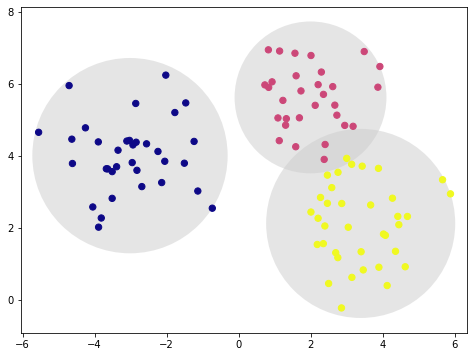

In [24]:
plt.figure(figsize=(8,6))
plot_kmeans(X,centroids,labels)